# The Sparks Foundation

### GRIP : Data Science and Business Analytics

### Author : James Mwangi

### Task 1 : Prediction Using Supervised Machine Learning

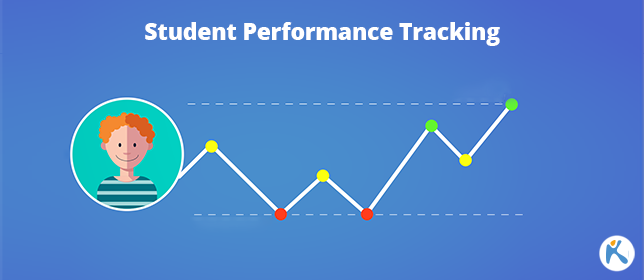


- The project aims to predict a student's percentage score based on the number of hours they have studied. 
- This is accomplished using a supervised machine learning approach, specifically linear regression. 
- The dataset used for this project contains information about the number of study hours and the corresponding percentage scores achieved by students. 
- The goal is to build a predictive model that can estimate a student's percentage score when provided with the number of hours they have dedicated to studying. 
- This straightforward task serves as an excellent example of how machine learning can be applied to solve real-world problems, making it an ideal introductory project for those new to the field.

Straight to the project.

# A  . Loading the Dataset.

In [1]:
#Importing the libaries and packages to use in the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#Importing the  Dataset
url = "http://bit.ly/w-data"

df = pd.read_csv(url)

# B. Initial Data Exploration.

In [2]:
#Viewing the dataframe
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


> - It's a simple dataset , with double columns. 
> - Hence wouldn't require too much EDA(Explanatory Data Analysis) or modelling preprocessing steps.

- ### Observing the datafame summary statistics

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000




Here's a brief synopsis of the data based on the statistics from df.describe():

- The dataset contains a total of **25** data points.
- The mean (average) study hours is approximately**5.012**, while the mean score is around **51.48.
- The standard deviation of study hours is approximately **2.525**, indicating the spread or variability in study hours among the students. Similarly, the standard deviation of scores is about **25.287**.
- The minimum study hours observed is **1.1**, with the corresponding minimum score of 17. This represents the students who studied the least.
- The 25th percentile (Q1) of study hours is **2.7**, and the 25th percentile of scores is **30**. This means that 25% of the students studied for less than or equal to **2.7** hours and scored **30 or less**.
- The median (50th percentile) study hours is 4.8, and the median score is 47. The median represents the middle value of the dataset.
- The 75th percentile (Q3) of study hours is 7.4, and the 75th percentile of scores is 75. This indicates that 75% of the students studied for less than or equal to 7.4 hours and scored 75 or less.
- The maximum study hours observed is 9.2, with the corresponding maximum score of 95. This represents the students who studied the most.

- ##  Visualizing the Data 
>- For Explanatory analysis.
>- Understanding the data proper.

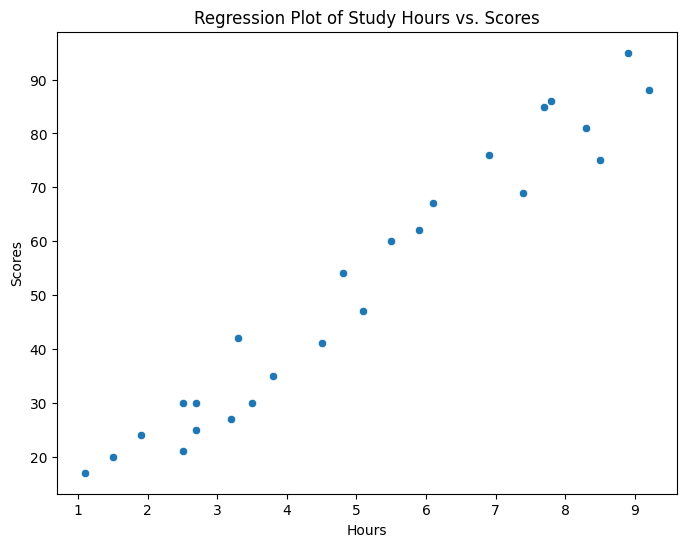

In [4]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.title('Regression Plot of Study Hours vs. Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


### Explanation:

1. **Data Distribution:** The scatter plot displays each data point as a dot on a two-dimensional plane. In this case, the x-axis represents "Hours," which is the number of hours a student has studied, and the y-axis represents "Scores," which is the corresponding scores obtained by each student.

2. **Individual Data Points:** Each dot on the scatter plot represents one student's data. The horizontal position of the dot (its x-coordinate) corresponds to the number of study hours for that student, and the vertical position (its y-coordinate) represents the score achieved by that student. In this plot, there are 25 data points, each showing the relationship between study hours and scores for a different student.

3. **Distribution Pattern:** By observing the scatter plot, you can see that there is a visible trend. As the number of study hours increases, there is a tendency for the scores to increase as well. This suggests a positive correlation between study hours and scores, which is intuitively expected – students who study more tend to perform better.

4. **Data Spread:** The data points are somewhat spread out but generally follow the upward trend. There is a cluster of points around the lower left corner, which indicates that some students who studied fewer hours achieved lower scores. At the same time, there is a cluster of points around the upper right corner, showing that students who studied more hours tend to achieve higher scores. The spread of the data points in between represents the variability in scores for different levels of study hours.

5. **Visualization of Data:** Scatter plots are valuable for visualizing data relationships, identifying trends, and spotting outliers. In this case, the scatter plot visually confirms that the number of study hours is positively related to the scores, supporting the notion that more study hours lead to better performance.

>  In summary, this scatter plot provides an initial visual understanding of the relationship between study hours and scores, confirming a positive correlation between the two variables. 

- ### The counts of each variable.
  - We get this by using histograms.

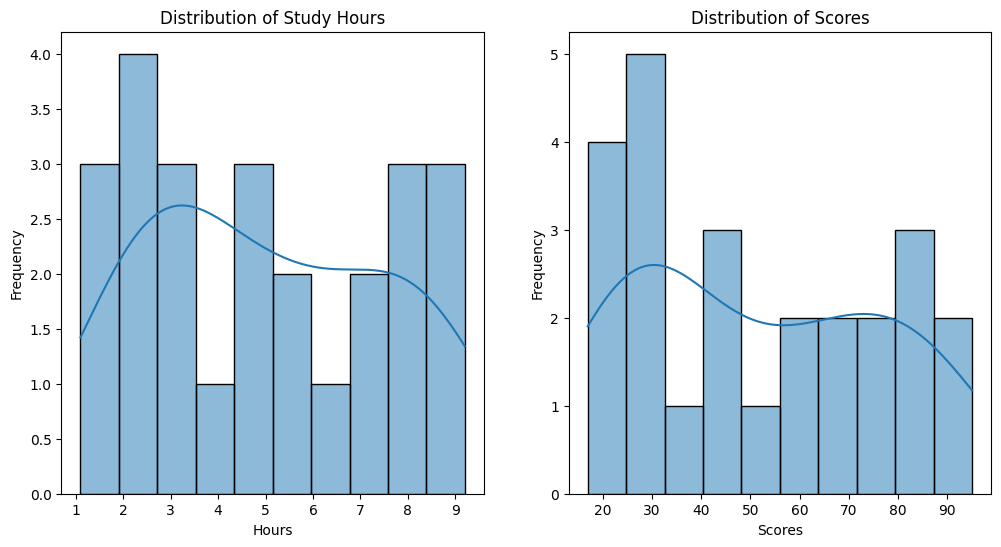

In [5]:
# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Hours'], bins=10, kde=True)
plt.title('Distribution of Study Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Scores'], bins=10, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

The histograms provide insights into the distribution of study hours and scores in the given dataset:

### 1. Distribution of Study Hours:

   - The left histogram represents the distribution of study hours. Each bar in the histogram represents a range of study hours, and the height of the bar indicates the frequency of students falling within that range.
   - The data appears to be somewhat normally distributed with a peak around 2.5 to 4.0 hours of study. This suggests that a significant number of students in the dataset study for approximately 2.5 to 4.0 hours.
   - The distribution is slightly right-skewed, meaning there are fewer students who study for very long hours.
   
### 2. Distribution of Scores:

   - The right histogram represents the distribution of scores. Similarly, each bar in the histogram represents a range of scores, and the height of the bar indicates the frequency of students achieving scores within that range.
   - The data shows a nearly normal distribution, with a peak around 45 to 75 scores. This suggests that a substantial number of students achieved scores in this range.
   - There are relatively fewer students with very high or very low scores, as indicated by the lower frequencies in the tails of the distribution.
   
> - In summary, the histograms show the distributions of study hours and scores in the dataset. 
> - They provide a visual representation of the data, highlighting the concentration of students around certain values and the overall shape of the data distribution.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


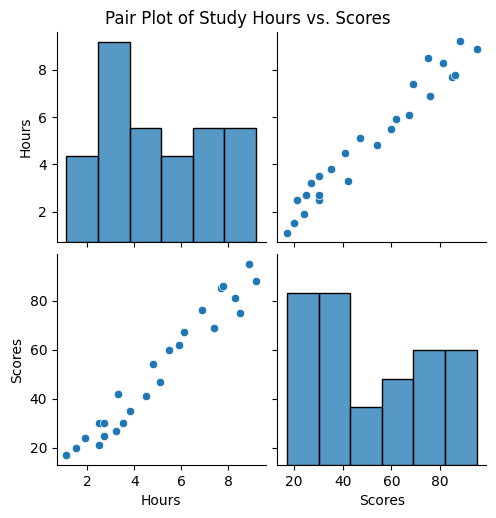

In [6]:
# Pair Plot
sns.pairplot(df)
plt.suptitle('Pair Plot of Study Hours vs. Scores', y=1.02)
plt.show()

The pair plot provides a visual overview of the relationships between different variables in the dataset, particularly between "Study Hours" and "Scores." Here are the interpretations of the pair plot results:

### 1. Scatter Plots:

   - The main diagonal of the pair plot consists of histograms for "Study Hours" and "Scores." We can see the distribution of each variable as discussed earlier.
   - The scatter plots below and above the main diagonal show the relationships between "Study Hours" and "Scores."
   
### 2. Scatter Plots (Study Hours vs. Scores):

- The scatter plots reveal a positive linear relationship between "Study Hours" and "Scores." This means that as the number of study hours increases, the scores tend to increase as well. It indicates a positive correlation.
### 3.Correlation:

   - The pair plot doesn't show correlation coefficients, but from the scatter plots, you can observe a strong positive correlation between "Study Hours" and "Scores." This suggests that students who study more hours tend to achieve higher scores.
### 4. Outliers:

- There don't appear to be significant outliers in the data. Most data points follow the general trend of the positive correlation.
### 5. Homoscedasticity (homogeneity of variance):

- The spread of points around the regression line appears relatively consistent, indicating homoscedasticity. 
- This means that the variability in scores is roughly constant across different levels of study hours.

> - In summary, the pair plot visually confirms that there is a strong positive linear relationship between study hours and

Next 

# C. Data Modelling.

- In Data Modelling , we begin with data preparation.

- ## Step 1: Data Splitting
>-  Split the data into training and testing sets.

In [7]:
#Split data to feature and target variables
X = df[['Hours']]  # Feature
y = df['Scores']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- ## Step 2: Model Building
> - Building a linear regression model

In [8]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

## Step  3 : Model Evaluation.
- Evaluate the model's performance on the test set.
- Metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R^2) are commonly used for regression tasks.

In [9]:
# Predict scores on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
R-squared: 0.9678055545167994


1. **Mean Absolute Error (MAE):** MAE is a measure of the average absolute difference between the actual scores (y_test) and the predicted scores (y_pred). In this case, the MAE is approximately 3.92. This means, on average, the model's predictions are off by about 3.92 points from the actual scores. Lower MAE values indicate better model performance, so a MAE of 3.92 suggests that the model provides relatively accurate predictions.

2. **Mean Squared Error (MSE):** MSE measures the average of the squared differences between the actual scores and the predicted scores. A lower MSE indicates that the model's predictions are closer to the actual scores. The MSE in this case is approximately 18.94.

3. **R-squared (R2) Score:**  R-squared is a measure of how well the model explains the variance in the data. It represents the proportion of the variance in the dependent variable (student scores) that can be explained by the independent variable (study hours). An R2 score of 0.968 indicates that the model explains about 96.8% of the variance in student scores, which is a very high value. This suggests that the model is an excellent fit for the data.

>- Overall, the results suggest that the model is quite effective in predicting student scores based on study hours.
>- The **low MAE** and **MSE** values indicate that the model's predictions are close to the actual scores, and the high R2 score indicates that the model explains a significant portion of the variance in student performance. 
>- These results demonstrate that a linear regression model can provide accurate predictions for this specific dataset.

## Step 4 : Visualization of the Regression Line.
- Visualizing the regression line that the model has learned.

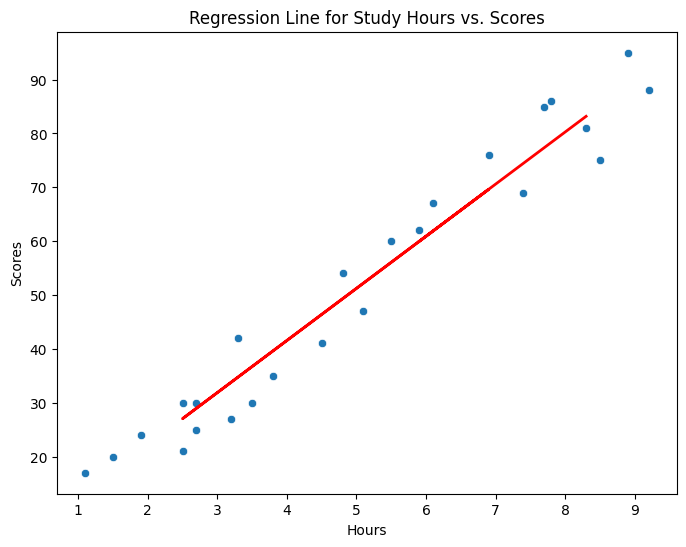

In [10]:
# Visualize the regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regression Line for Study Hours vs. Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


1. **Scatter Plot:** The scatter plot shows the data points for each student's study hours and their corresponding scores. Each data point represents a student, and its position on the plot is determined by the number of hours they studied (x-axis) and their score (y-axis). The scattered points give you an overall sense of how study hours and scores are distributed in the dataset.

2. **Regression Line:** The red line on the plot is the regression line, which is the line of best fit generated by the linear regression model. This line represents the relationship between study hours and scores as predicted by the model. It's a straight line that aims to minimize the overall distance between the data points and the line. In simple linear regression, the line has the equation: y = mx + b, where y is the predicted score, x is the study hours, m is the slope of the line, and b is the y-intercept.

3. **Interpretation:** As you can see, the regression line has a positive slope, which means that there is a positive correlation between study hours and scores. In other words, as the number of study hours increases, the predicted scores also tend to increase. This aligns with our intuition that students who study more hours tend to achieve higher scores.

4. **Model Accuracy:** The fact that the regression line closely follows the distribution of data points in the scatter plot suggests that the linear regression model is a good fit for this data. The line captures the underlying trend and provides a reasonable estimate of a student's score based on their study hours.

> - Overall, the visualization helps you understand how well the linear regression model fits the data. 
>- The regression line provides a clear representation of the relationship between study hours and scores, and it visually demonstrates that the model's predictions align with the dataset.

In [11]:
# Predict the score for a new study hour
new_hours = [[5.0]]  # Example: Predict for 5 hours of study
predicted_score = model.predict(new_hours)
print(f'Predicted Score: {predicted_score[0]}')

Predicted Score: 51.23728312617822


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


>- The warning message you're seeing is related to the fact that the LinearRegression model is being used without specifying feature names. 
>- This warning is primarily informational 

### User Story: What will be predicted score if a student studies for 9.25hrs /day?

In [12]:
# Predict the score for a student who studies for 9.25 hours/day
new_hours = [[9.25]]
predicted_score = model.predict(new_hours)
print(f'Predicted Score for 9.25 hours/day of study: {predicted_score[0]}')


Predicted Score for 9.25 hours/day of study: 92.38611528261494


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
